In [ ]:
import pandas as pd

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
colab_path = '/content/drive/MyDrive/'

In [ ]:
# bank 데이터를 불러옵니다.
df = pd.read_csv(colab_path +'bank.csv',delimiter=";")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# 원-핫 인코딩 처리를 합니다.
df = pd.get_dummies(df)


# 개인정보를 X로, 계좌 개설여부를 y로 저장합니다.
X = df.iloc[:,0:51]
y = df.iloc[:,51:53]

df

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,59,0,5,226,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4519,28,1137,6,129,4,211,3,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
# 결측치 확인
df.isnull().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0


In [ ]:
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(12,input_dim=51, activation='relu'))
#model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                624       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 746 (2.91 KB)
Trainable params: 746 (2.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


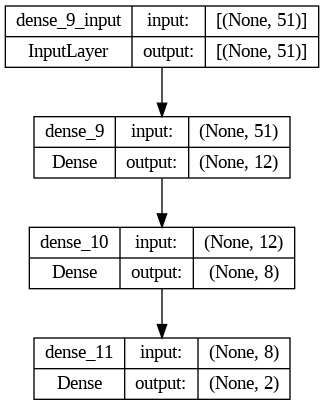

In [ ]:
# 모델 구조를 시각화
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [ ]:
# 학습이 언제 자동 중단될지 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
# 최적화 모델이 저장될 폴더와 모델 이름을 정합니다.
modelpath = "./1st-Term-Project-bestmodel.hdf5"
# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [ ]:
# 모델을 컴파일 합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델을 실행합니다.
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
6/6 [==============================] - 1s 43ms/step - loss: 113.0329 - accuracy: 0.4204 - val_loss: 105.1147 - val_accuracy: 0.4624
Epoch 2/2000
6/6 [==============================] - 0s 11ms/step - loss: 92.8247 - accuracy: 0.5118 - val_loss: 84.0549 - val_accuracy: 0.5962
Epoch 3/2000
6/6 [==============================] - 0s 16ms/step - loss: 73.8623 - accuracy: 0.6523 - val_loss: 63.9504 - val_accuracy: 0.8673
Epoch 4/2000
1/6 [====>.........................] - ETA: 0s - loss: 52.6291 - accuracy: 0.8640

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 19ms/step - loss: 55.2610 - accuracy: 0.8732 - val_loss: 45.2432 - val_accuracy: 0.9004
Epoch 5/2000
6/6 [==============================] - 0s 18ms/step - loss: 38.4959 - accuracy: 0.8754 - val_loss: 28.5726 - val_accuracy: 0.9004
Epoch 6/2000
6/6 [==============================] - 0s 53ms/step - loss: 24.6072 - accuracy: 0.8754 - val_loss: 15.4296 - val_accuracy: 0.9004
Epoch 7/2000
6/6 [==============================] - 0s 65ms/step - loss: 14.8447 - accuracy: 0.8754 - val_loss: 9.6174 - val_accuracy: 0.9004
Epoch 8/2000
6/6 [==============================] - 0s 36ms/step - loss: 12.8173 - accuracy: 0.8754 - val_loss: 9.8895 - val_accuracy: 0.9004
Epoch 9/2000
6/6 [==============================] - 0s 19ms/step - loss: 12.7703 - accuracy: 0.8754 - val_loss: 9.3886 - val_accuracy: 0.9004
Epoch 10/2000
6/6 [==============================] - 0s 21ms/step - loss: 11.8749 - accuracy: 0.8754 - val_loss: 8.5025 - val_accuracy: 0.9004
Epoch 11/2000
6

In [ ]:
# 테스트 결과를 출력합니다.
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

29/29 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8917
Test accuracy: 0.8917127251625061


In [ ]:
#오차, 정확도, 검증셋 오차, 검증셋 정확도 확인
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,17.493187,0.258850,13.579212,0.327434
1,12.527014,0.335177,10.506269,0.369469
2,10.397244,0.383850,8.702538,0.404867
3,8.893149,0.415560,7.161498,0.441372
4,7.419940,0.474558,5.676543,0.505531
...,...,...,...,...
280,0.264955,0.896755,0.339560,0.866150
281,0.281685,0.893437,0.316853,0.870575
282,0.297295,0.884587,0.373843,0.881637
283,0.295656,0.891962,0.311978,0.875000


In [ ]:
#학습한 모델을 검증셋에 적용해 얻은 오차는 y_vloss에 저장, 학습셋에서 얻은 오차는 y_loss에 저장
y_vloss=hist_df['val_loss']
y_loss=hist_df['loss']

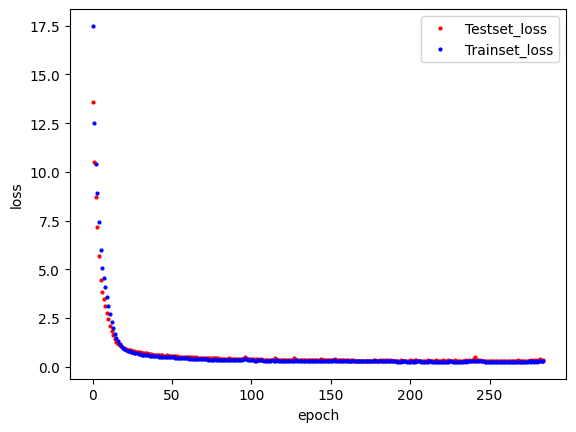

In [ ]:
# 그래프로 표시
import numpy as np
import matplotlib.pyplot as plt
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
y_train

In [ ]:
import random as rd

unique_values = {}

for col in df.columns:
    # 각 컬럼의 고유한 값들을 리스트에 저장
    unique_values[col] = df[col].tolist()
    unique_values[col] = list(set(unique_values[col]))
    unique_values[col].sort()

# 결과 출력
for col, values in unique_values.items():
    print(f"Unique values for column '{col}': {values}")


columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']
rows = [[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87],
        ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'],
        ['divorced', 'married', 'single'],
        ['primary', 'secondary', 'tertiary', 'unknown'],
        ['no', 'yes'],
        [-3313, -2082, -1746, -1680, -1400, -1313, -1310, -1224, -1212, -1206, -1202, -1164, -1148, -1053, -988, -970, -967, -966, -938, -932, -921, -905, -892, -888, -887, -872, -852, -849, -839, -824, -770, -762, -759, -735, -715, -710, -703, -701, -679, -674, -673, -665, -650, -635, -632, -630, -626, -617, -614, -612, -606, -589, -588, -587, -584, -583, -568, -566, -563, -559, -558, -552, -551, -547, -540, -535, -522, -518, -517, -516, -502, -498, -495, -478, -477, -471, -470, -469, -465, -464, -461, -459, -454, -452, -449, -435, -427, -424, -423, -422, -416, -411, -407, -406, -405, -404, -402, -401, -399, -396, -393, -388, -386, -384, -381, -379, -378, -375, -370, -365, -363, -352, -350, -346, -342, -339, -337, -336, -335, -333, -331, -329, -328, -322, -320, -319, -315, -314, -312, -311, -308, -306, -305, -302, -300, -298, -296, -294, -292, -287, -285, -282, -280, -278, -276, -259, -256, -255, -254, -253, -251, -249, -247, -246, -244, -242, -241, -237, -231, -230, -229, -228, -226, -221, -220, -219, -218, -217, -216, -206, -204, -202, -200, -196, -195, -194, -192, -191, -189, -186, -183, -182, -179, -166, -163, -162, -154, -151, -149, -148, -147, -145, -140, -139, -136, -133, -131, -129, -124, -123, -121, -120, -119, -118, -117, -113, -110, -107, -105, -102, -101, -99, -98, -97, -94, -93, -91, -90, -88, -84, -81, -80, -79, -77, -76, -75, -74, -73, -72, -70, -67, -63, -62, -59, -56, -55, -54, -53, -51, -50, -49, -47, -46, -45, -41, -37, -35, -34, -33, -32, -31, -29, -28, -27, -26, -23, -22, -20, -19, -18, -17, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 235, 236, 237, 238, 239, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 270, 271, 272, 273, 275, 276, 278, 279, 280, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 381, 382, 383, 384, 385, 386, 388, 389, 390, 391, 393, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 442, 443, 444, 445, 446, 447, 448, 450, 451, 452, 453, 454, 455, 456, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 489, 490, 491, 492, 493, 494, 495, 497, 498, 499, 500, 501, 502, 504, 505, 506, 507, 508, 509, 511, 512, 515, 516, 517, 518, 519, 520, 523, 524, 525, 526, 529, 532, 534, 537, 538, 539, 540, 541, 542, 543, 544, 547, 548, 549, 550, 551, 552, 553, 555, 556, 557, 558, 559, 560, 562, 563, 565, 566, 567, 568, 569, 572, 573, 574, 575, 576, 577, 578, 579, 581, 582, 584, 585, 586, 588, 589, 590, 591, 592, 593, 594, 595, 596, 598, 599, 602, 603, 604, 605, 606, 607, 608, 609, 610, 613, 614, 616, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 638, 639, 640, 641, 642, 643, 644, 645, 647, 648, 649, 653, 654, 655, 656, 657, 658, 659, 660, 661, 663, 664, 665, 666, 667, 668, 669, 670, 671, 673, 674, 677, 678, 679, 680, 681, 685, 687, 688, 689, 690, 691, 693, 694, 695, 696, 697, 699, 700, 701, 702, 703, 704, 705, 706, 710, 712, 714, 715, 716, 717, 719, 720, 722, 724, 725, 726, 728, 732, 733, 736, 738, 739, 740, 741, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 755, 756, 757, 759, 760, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 784, 786, 787, 788, 789, 790, 792, 793, 794, 795, 796, 799, 800, 801, 802, 804, 806, 807, 808, 809, 810, 811, 812, 815, 816, 817, 818, 819, 820, 821, 822, 823, 825, 826, 827, 828, 832, 833, 834, 835, 836, 837, 838, 839, 841, 842, 844, 846, 847, 848, 849, 851, 852, 856, 857, 858, 860, 864, 865, 866, 867, 868, 871, 872, 874, 876, 877, 878, 879, 881, 882, 883, 887, 888, 889, 890, 894, 895, 896, 897, 899, 900, 901, 902, 907, 908, 912, 913, 914, 917, 920, 921, 923, 925, 926, 929, 930, 931, 932, 934, 935, 936, 937, 940, 942, 943, 944, 946, 948, 949, 950, 951, 952, 954, 955, 957, 959, 960, 961, 964, 966, 967, 969, 973, 975, 976, 977, 978, 979, 980, 981, 982, 983, 985, 989, 990, 991, 992, 994, 995, 997, 998, 999, 1005, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1016, 1017, 1019, 1020, 1021, 1022, 1025, 1026, 1027, 1029, 1031, 1032, 1033, 1034, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1052, 1053, 1054, 1057, 1058, 1059, 1060, 1062, 1063, 1064, 1065, 1066, 1067, 1069, 1070, 1071, 1072, 1073, 1076, 1080, 1084, 1086, 1088, 1091, 1092, 1094, 1097, 1100, 1102, 1103, 1109, 1111, 1114, 1116, 1117, 1121, 1122, 1123, 1128, 1129, 1130, 1133, 1134, 1136, 1137, 1138, 1139, 1141, 1142, 1143, 1145, 1146, 1147, 1148, 1149, 1150, 1152, 1153, 1156, 1157, 1158, 1159, 1160, 1161, 1164, 1165, 1166, 1167, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1177, 1178, 1180, 1183, 1185, 1187, 1188, 1190, 1191, 1193, 1198, 1199, 1200, 1203, 1205, 1206, 1209, 1210, 1211, 1214, 1216, 1217, 1218, 1219, 1221, 1222, 1224, 1230, 1233, 1235, 1238, 1239, 1240, 1242, 1243, 1249, 1253, 1257, 1259, 1260, 1265, 1266, 1268, 1269, 1270, 1273, 1274, 1275, 1278, 1279, 1281, 1283, 1285, 1286, 1287, 1289, 1291, 1295, 1297, 1298, 1304, 1306, 1308, 1309, 1310, 1313, 1314, 1315, 1317, 1318, 1319, 1322, 1323, 1325, 1327, 1328, 1331, 1333, 1334, 1335, 1337, 1339, 1341, 1343, 1347, 1350, 1351, 1354, 1355, 1361, 1367, 1368, 1370, 1372, 1373, 1375, 1378, 1380, 1382, 1384, 1386, 1387, 1388, 1390, 1397, 1405, 1407, 1409, 1410, 1412, 1413, 1415, 1416, 1420, 1424, 1427, 1429, 1430, 1433, 1438, 1439, 1445, 1448, 1449, 1451, 1453, 1459, 1464, 1465, 1466, 1467, 1469, 1471, 1472, 1476, 1477, 1480, 1482, 1490, 1491, 1494, 1495, 1499, 1503, 1504, 1506, 1509, 1511, 1513, 1514, 1516, 1517, 1518, 1519, 1520, 1521, 1526, 1529, 1531, 1532, 1533, 1534, 1536, 1539, 1544, 1545, 1547, 1548, 1550, 1553, 1554, 1555, 1557, 1558, 1562, 1564, 1566, 1567, 1568, 1570, 1572, 1573, 1574, 1577, 1580, 1582, 1583, 1584, 1585, 1587, 1588, 1592, 1594, 1598, 1599, 1601, 1602, 1603, 1611, 1612, 1613, 1621, 1623, 1625, 1626, 1628, 1633, 1634, 1640, 1641, 1646, 1649, 1657, 1660, 1661, 1663, 1664, 1665, 1666, 1667, 1670, 1671, 1672, 1673, 1678, 1679, 1680, 1689, 1691, 1693, 1694, 1696, 1698, 1699, 1700, 1704, 1707, 1712, 1721, 1727, 1729, 1731, 1732, 1734, 1738, 1743, 1746, 1750, 1757, 1758, 1760, 1766, 1770, 1772, 1781, 1783, 1784, 1787, 1790, 1792, 1796, 1798, 1801, 1808, 1810, 1811, 1818, 1819, 1825, 1830, 1831, 1832, 1836, 1840, 1843, 1844, 1847, 1852, 1855, 1859, 1868, 1869, 1871, 1876, 1877, 1881, 1882, 1883, 1890, 1893, 1897, 1903, 1904, 1905, 1906, 1909, 1910, 1916, 1922, 1924, 1925, 1927, 1929, 1931, 1932, 1934, 1937, 1942, 1944, 1948, 1949, 1956, 1957, 1959, 1960, 1970, 1972, 1978, 1980, 1981, 1983, 1987, 1988, 1989, 1990, 1992, 1996, 1998, 2007, 2008, 2013, 2023, 2030, 2033, 2034, 2038, 2039, 2048, 2058, 2059, 2061, 2067, 2070, 2072, 2077, 2085, 2087, 2089, 2094, 2096, 2098, 2104, 2105, 2106, 2111, 2116, 2125, 2128, 2131, 2137, 2139, 2142, 2144, 2145, 2146, 2154, 2155, 2157, 2160, 2169, 2171, 2178, 2179, 2185, 2186, 2187, 2189, 2190, 2195, 2197, 2201, 2204, 2206, 2211, 2223, 2225, 2226, 2227, 2231, 2232, 2237, 2240, 2246, 2253, 2262, 2269, 2273, 2275, 2278, 2281, 2284, 2285, 2288, 2289, 2294, 2301, 2303, 2304, 2305, 2306, 2308, 2317, 2319, 2320, 2322, 2323, 2325, 2330, 2343, 2347, 2349, 2357, 2358, 2363, 2366, 2370, 2374, 2378, 2380, 2381, 2394, 2395, 2398, 2400, 2403, 2408, 2411, 2416, 2418, 2420, 2431, 2433, 2442, 2443, 2457, 2465, 2469, 2478, 2485, 2486, 2488, 2497, 2506, 2508, 2515, 2519, 2523, 2524, 2536, 2537, 2538, 2540, 2542, 2543, 2544, 2548, 2552, 2557, 2558, 2567, 2569, 2571, 2572, 2576, 2581, 2587, 2590, 2594, 2597, 2600, 2603, 2610, 2613, 2627, 2628, 2629, 2642, 2643, 2644, 2646, 2647, 2657, 2658, 2662, 2678, 2679, 2682, 2685, 2693, 2700, 2705, 2706, 2707, 2715, 2718, 2723, 2727, 2729, 2731, 2734, 2747, 2749, 2763, 2764, 2767, 2769, 2770, 2776, 2788, 2789, 2793, 2805, 2806, 2812, 2814, 2815, 2817, 2819, 2830, 2843, 2850, 2855, 2880, 2881, 2885, 2886, 2887, 2892, 2893, 2903, 2904, 2914, 2917, 2921, 2923, 2926, 2927, 2929, 2934, 2944, 2959, 2960, 2967, 2971, 2974, 2975, 2979, 2980, 2984, 2987, 2988, 2993, 2998, 3014, 3016, 3018, 3021, 3025, 3043, 3050, 3052, 3057, 3060, 3064, 3068, 3071, 3074, 3083, 3096, 3098, 3102, 3107, 3132, 3134, 3143, 3161, 3163, 3165, 3170, 3172, 3177, 3180, 3186, 3188, 3190, 3196, 3215, 3217, 3222, 3228, 3230, 3232, 3234, 3238, 3242, 3250, 3274, 3276, 3283, 3285, 3288, 3298, 3301, 3304, 3315, 3316, 3333, 3334, 3337, 3339, 3342, 3343, 3354, 3355, 3357, 3370, 3371, 3382, 3387, 3391, 3401, 3403, 3412, 3419, 3431, 3432, 3436, 3450, 3451, 3452, 3455, 3463, 3470, 3472, 3485, 3496, 3514, 3516, 3529, 3533, 3534, 3540, 3552, 3554, 3561, 3571, 3573, 3575, 3576, 3587, 3601, 3608, 3611, 3616, 3620, 3636, 3638, 3653, 3658, 3663, 3665, 3671, 3672, 3676, 3681, 3694, 3696, 3704, 3705, 3706, 3723, 3726, 3727, 3732, 3733, 3735, 3748, 3762, 3771, 3777, 3782, 3792, 3797, 3800, 3809, 3810, 3823, 3825, 3854, 3859, 3872, 3873, 3875, 3897, 3904, 3913, 3921, 3924, 3927, 3931, 3935, 3939, 3940, 3945, 3948, 3950, 3953, 3972, 3973, 3975, 3990, 3992, 4007, 4012, 4015, 4020, 4022, 4030, 4039, 4040, 4063, 4073, 4075, 4079, 4086, 4089, 4094, 4099, 4103, 4108, 4111, 4130, 4143, 4148, 4153, 4157, 4170, 4189, 4194, 4196, 4198, 4209, 4210, 4213, 4229, 4232, 4256, 4265, 4280, 4286, 4287, 4303, 4335, 4343, 4348, 4365, 4366, 4374, 4380, 4382, 4384, 4402, 4404, 4415, 4424, 4425, 4438, 4441, 4446, 4460, 4500, 4503, 4508, 4515, 4531, 4539, 4541, 4543, 4554, 4565, 4567, 4579, 4590, 4608, 4610, 4629, 4646, 4657, 4659, 4664, 4665, 4667, 4684, 4717, 4722, 4738, 4745, 4758, 4760, 4761, 4785, 4787, 4789, 4790, 4795, 4798, 4809, 4820, 4824, 4831, 4848, 4855, 4885, 4888, 4895, 4897, 4900, 4902, 4906, 4908, 4937, 4943, 4945, 4958, 4968, 4994, 5037, 5039, 5045, 5050, 5057, 5060, 5063, 5086, 5092, 5095, 5106, 5108, 5110, 5116, 5122, 5137, 5172, 5173, 5181, 5191, 5195, 5207, 5235, 5244, 5278, 5291, 5304, 5306, 5310, 5314, 5320, 5346, 5355, 5366, 5403, 5426, 5431, 5436, 5450, 5462, 5498, 5514, 5527, 5533, 5543, 5549, 5563, 5564, 5597, 5639, 5673, 5706, 5715, 5731, 5739, 5774, 5776, 5780, 5799, 5801, 5803, 5845, 5878, 5883, 5887, 5902, 5920, 5957, 5958, 5969, 5980, 5996, 6000, 6016, 6046, 6053, 6072, 6095, 6101, 6102, 6145, 6164, 6217, 6248, 6269, 6290, 6307, 6313, 6402, 6411, 6421, 6483, 6495, 6563, 6570, 6610, 6613, 6619, 6637, 6649, 6699, 6704, 6728, 6766, 6767, 6836, 6839, 6844, 6850, 6880, 6900, 6904, 6922, 6945, 6968, 6969, 6979, 7007, 7010, 7020, 7041, 7050, 7066, 7082, 7108, 7124, 7138, 7179, 7190, 7195, 7289, 7290, 7317, 7337, 7343, 7353, 7378, 7495, 7513, 7546, 7635, 7685, 7696, 7702, 7708, 7727, 7735, 7744, 7780, 7802, 7813, 7845, 7864, 7876, 7929, 7944, 8004, 8023, 8038, 8044, 8104, 8106, 8131, 8139, 8167, 8218, 8238, 8262, 8295, 8304, 8309, 8312, 8366, 8436, 8494, 8515, 8545, 8556, 8627, 8647, 8652, 8669, 8876, 8883, 8894, 8902, 8969, 9009, 9019, 9121, 9146, 9149, 9207, 9216, 9228, 9269, 9305, 9324, 9328, 9339, 9374, 9449, 9676, 9720, 9756, 9851, 9976, 10177, 10218, 10287, 10378, 10655, 10758, 10786, 10787, 10788, 10888, 10907, 10910, 10924, 11084, 11219, 11262, 11269, 11303, 11386, 11417, 11494, 11555, 11797, 11971, 12186, 12223, 12437, 12519, 12531, 12569, 12607, 12877, 13044, 13117, 13156, 13204, 13229, 13342, 13494, 13658, 13669, 13683, 13711, 13893, 14058, 14093, 14220, 14363, 14412, 14440, 14533, 14752, 15030, 15311, 15459, 15520, 15834, 16063, 16178, 16264, 16353, 16430, 16873, 16874, 16957, 16992, 17361, 17555, 18347, 19317, 19358, 19447, 20453, 21244, 21515, 21664, 22171, 22196, 22370, 22546, 22856, 23663, 25824, 26306, 26394, 26452, 26965, 27069, 27359, 27733, 42045, 71188],
        ['no', 'yes'],
        ['no', 'yes'],
        ['cellular', 'telephone', 'unknown'],
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
        ['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'],
        [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 439, 441, 442, 443, 445, 446, 447, 449, 450, 451, 452, 454, 455, 456, 457, 458, 460, 461, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 497, 500, 501, 502, 503, 504, 505, 506, 508, 509, 510, 513, 514, 515, 516, 517, 518, 519, 520, 521, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 546, 547, 548, 549, 550, 551, 553, 554, 555, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 574, 576, 577, 578, 579, 580, 582, 585, 586, 587, 588, 590, 592, 593, 594, 595, 597, 598, 599, 600, 601, 602, 603, 605, 606, 607, 609, 610, 611, 612, 614, 615, 617, 618, 619, 620, 622, 623, 624, 626, 627, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 643, 644, 645, 646, 648, 650, 651, 652, 653, 654, 655, 656, 657, 659, 660, 661, 663, 664, 665, 667, 668, 669, 670, 671, 672, 673, 674, 676, 679, 680, 681, 682, 684, 686, 688, 690, 691, 693, 696, 697, 698, 699, 700, 701, 702, 707, 709, 712, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 727, 728, 730, 731, 732, 733, 735, 736, 738, 742, 743, 744, 746, 747, 748, 749, 750, 753, 754, 755, 756, 757, 758, 759, 761, 762, 763, 764, 765, 766, 767, 768, 770, 772, 773, 775, 777, 779, 780, 781, 783, 785, 788, 789, 792, 793, 796, 798, 799, 800, 803, 805, 806, 808, 809, 812, 814, 815, 816, 819, 820, 821, 825, 827, 830, 834, 836, 847, 854, 857, 860, 863, 865, 866, 868, 869, 873, 875, 876, 877, 882, 883, 884, 891, 897, 904, 907, 908, 910, 915, 916, 921, 923, 924, 929, 931, 935, 936, 937, 945, 951, 952, 955, 956, 957, 958, 959, 965, 968, 971, 973, 976, 977, 978, 984, 986, 988, 990, 993, 994, 998, 1006, 1007, 1009, 1010, 1011, 1015, 1017, 1018, 1021, 1022, 1028, 1029, 1030, 1031, 1032, 1034, 1044, 1056, 1060, 1063, 1065, 1073, 1081, 1083, 1088, 1097, 1101, 1117, 1124, 1126, 1130, 1139, 1143, 1149, 1151, 1156, 1164, 1165, 1168, 1173, 1174, 1178, 1181, 1183, 1199, 1210, 1212, 1223, 1225, 1231, 1234, 1236, 1258, 1259, 1263, 1275, 1282, 1309, 1337, 1366, 1370, 1386, 1407, 1434, 1441, 1448, 1451, 1467, 1472, 1473, 1476, 1484, 1504, 1516, 1521, 1529, 1531, 1532, 1558, 1579, 1608, 1663, 1689, 1713, 1721, 1735, 1740, 1816, 1877, 1971, 1994, 2029, 2087, 2456, 2769, 3025],
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 44, 50],
        [-1, 1, 2, 3, 5, 7, 28, 38, 56, 57, 58, 59, 60, 61, 62, 63, 64, 69, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 126, 127, 130, 131, 133, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 201, 204, 205, 206, 207, 208, 209, 210, 211, 212, 219, 221, 222, 223, 224, 225, 227, 231, 232, 234, 235, 238, 239, 241, 242, 244, 246, 247, 248, 249, 250, 253, 254, 255, 256, 258, 259, 260, 261, 262, 264, 265, 266, 267, 268, 270, 271, 272, 273, 274, 275, 278, 280, 281, 282, 283, 284, 286, 287, 288, 291, 292, 293, 294, 295, 297, 298, 299, 300, 303, 305, 308, 309, 311, 312, 313, 315, 316, 317, 319, 321, 322, 323, 325, 326, 327, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 373, 374, 375, 378, 382, 385, 386, 388, 397, 404, 414, 415, 426, 435, 436, 450, 460, 461, 462, 467, 474, 479, 484, 500, 541, 674, 683, 687, 761, 804, 808, 871],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 22, 23, 24, 25],
        ['failure', 'other', 'success', 'unknown'],
        ['no', 'yes']]

# 각 컬럼의 값을 905개의 행으로 반복하여 생성
data = {col: np.random.choice(vals, 905) for col, vals in zip(columns, rows)}

# 새로운 데이터프레임 생성
new_df = pd.DataFrame(data)

# 결과 확인
new_df

Unique values for column 'age': [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87]
Unique values for column 'job': ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']
Unique values for column 'marital': ['divorced', 'married', 'single']
Unique values for column 'education': ['primary', 'secondary', 'tertiary', 'unknown']
Unique values for column 'default': ['no', 'yes']
Unique values for column 'balance': [-3313, -2082, -1746, -1680, -1400, -1313, -1310, -1224, -1212, -1206, -1202, -1164, -1148, -1053, -988, -970, -967, -966, -938, -932, -921, -905, -892, -888, -887, -872, -852, -849, -839, -824, -770, -762, -759, -735, -715, -710, -703, -701, -679, -674, -673, -665,

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,76,unknown,married,primary,no,3810,no,yes,unknown,29,jan,709,7,97,6,failure,yes
1,69,entrepreneur,single,unknown,yes,2398,yes,yes,telephone,1,feb,73,1,317,17,unknown,yes
2,36,housemaid,single,unknown,yes,459,no,yes,telephone,21,sep,96,23,138,6,failure,yes
3,37,housemaid,divorced,primary,no,196,yes,yes,telephone,9,oct,521,18,291,22,other,yes
4,60,unemployed,married,tertiary,no,1058,no,yes,cellular,16,dec,257,16,299,24,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,68,retired,married,unknown,no,1243,no,no,cellular,17,feb,789,24,208,14,success,no
901,56,technician,single,tertiary,no,4157,no,no,cellular,6,apr,1971,14,87,0,failure,no
902,42,technician,divorced,secondary,yes,48,no,no,telephone,18,oct,1386,1,326,6,failure,yes
903,58,management,single,secondary,yes,3762,no,no,unknown,7,apr,754,25,479,25,success,no


In [ ]:
# 원-핫 인코딩 처리를 합니다.
new_df = pd.get_dummies(new_df)

# 개인정보를 X로, 계좌 개설여부를 y로 저장합니다.
new_df_X = new_df.iloc[:,0:51]
new_df_y = new_df.iloc[:,51:53]

# 결측치 확인
new_df.isnull().sum()


# 새로운 데이터프레임과의 정확성을 평가합니다.
score = model.evaluate(new_df_X, new_df_y)
print('Test accuracy:', score[1])

29/29 [==============================] - 0s 2ms/step - loss: 1.7520 - accuracy: 0.4851
Test accuracy: 0.48508286476135254


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 다중 클래스 분류 평가 지표 계산
precision = precision_score(new_df_y, y_test, average='macro')
recall = recall_score(new_df_y, y_test, average='macro')
f1 = f1_score(new_df_y, y_test, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.5078989882938715
Recall: 0.5029151028227383
F1 Score: 0.4048108596818265


In [ ]:
#오차, 정확도, 검증셋 오차, 검증셋 정확도 확인
hist_df = pd.DataFrame(history.history)
hist_df

#학습한 모델을 검증셋에 적용해 얻은 오차는 y_vloss에 저장, 학습셋에서 얻은 오차는 y_loss에 저장
y_vloss=hist_df['val_loss']
y_loss=hist_df['loss']

# 그래프로 표시
import numpy as np
import matplotlib.pyplot as plt
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()